In [73]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import statsmodels as sm
import statsmodels.api

from datetime import datetime, timedelta

import warnings
warnings.warn('my warning')

from dateutil.parser import parse

In [64]:
from datetime import timedelta

In [3]:
micro_1 = pd.read_excel("2017/2017-1.xlsx")

In [4]:
#raw data 상태
micro_1.head()

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,111121,중구,2017010101,0.006,1.3,0.002,0.068,77.0,63.0,서울 중구 덕수궁길 15
1,서울 중구,111121,중구,2017010102,0.006,1.4,0.002,0.066,76.0,63.0,서울 중구 덕수궁길 15
2,서울 중구,111121,중구,2017010103,0.005,1.2,0.002,0.063,73.0,57.0,서울 중구 덕수궁길 15
3,서울 중구,111121,중구,2017010104,0.005,1.1,0.002,0.053,67.0,55.0,서울 중구 덕수궁길 15
4,서울 중구,111121,중구,2017010105,0.004,1.1,0.002,0.051,66.0,54.0,서울 중구 덕수궁길 15


In [5]:
en_name = {"지역" : "region", 
           "측정소코드" : "station",
          "측정소명" : "station_name",
          "측정일시" : "date",
          "주소" : "address",
          }
micro_1.rename(columns = en_name, inplace = True)

In [6]:
#사용할 변수들이외 변수들 제거
micro_1 = micro_1[["region", "date", "PM10", "PM25"]]

In [7]:
micro_1.head()

,region,date,PM10,PM25
0,서울 중구,2017010101,77.0,63.0
1,서울 중구,2017010102,76.0,63.0
2,서울 중구,2017010103,73.0,57.0
3,서울 중구,2017010104,67.0,55.0
4,서울 중구,2017010105,66.0,54.0


#### 시간대별 미세먼지, 초미세먼지 농도 파악

In [74]:
def to_datetime2(date) :
    date = str(date)
    year, month, day, hour = date[:3+1], date[4:5+1], date[6:7+1], date[8:]
    if hour == str(24) :
        new_date = month + "/" + day + "/" + year + "/" + str((int(hour) - 1))
        result = parse(new_date) + timedelta(hours = 1)
        
    else :
        new_date = month + "/" + day + "/" + year + "/" + hour
        result = parse(new_date)
    
        
        
    return result.strftime("%Y-%m-%d %H")

In [79]:
micro_1["date"] = micro_1["date"].apply(lambda x : to_datetime2(x))

In [80]:
micro_1 = micro_1.set_index(pd.DatetimeIndex(micro_1["date"]))
micro_1.drop(labels = ["date"], axis = 1, inplace = True)

In [108]:
seoul_jungu = micro_1[micro_1["region"] == "서울 중구"]

In [91]:
day_mean = micro_1.resample("d").mean()

In [116]:
seoul_jungu.max(),seoul_jungu.min()

(region    서울 중구
 PM10        211
 PM25        116
 dtype: object, region    서울 중구
 PM10          5
 PM25          3
 dtype: object)

In [140]:
len(micro_1["region"].unique())

165

In [120]:
seoul_jungu.head()

,region,PM10,PM25
date,,,
2017-01-01 01:00:00,서울 중구,77.0,63.0
2017-01-01 02:00:00,서울 중구,76.0,63.0
2017-01-01 03:00:00,서울 중구,73.0,57.0
2017-01-01 04:00:00,서울 중구,67.0,55.0
2017-01-01 05:00:00,서울 중구,66.0,54.0


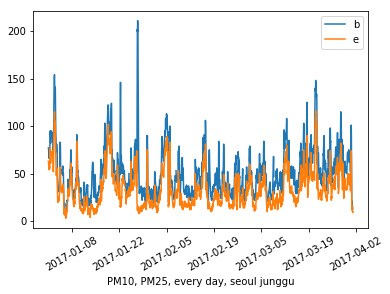

In [132]:
plt.plot(seoul_jungu[["PM10", "PM25"]])
plt.legend('best')
plt.xlabel(s = "PM10, PM25, every day, seoul junggu")
plt.xticks(rotation = 30)
plt.show()

In [157]:
for a in range(2+1) :
    print(a)
for b in "abcd".split() :
    print(b)

0
1
2
abcd


In [160]:
import platform
platform.platform()

'Windows-10-10.0.16299-SP0'

In [161]:
import sys
sys.version_info

sys.version_info(major=3, minor=6, micro=3, releaselevel='final', serial=0)

In [162]:
import matplotlib.font_manager as font_manager

font_list = font_manager.findSystemFonts(fontpaths = None)

In [163]:
print(len(font_list))

243


In [166]:
font_list = [f.name for f in mpl.font_manager.fontManager.ttflist if "Nanum" in f.name]
print(len(font_list)) 

font_list[:10]

0


[]

In [170]:
plt.rcParams["font.family"] = "Nanumothic"

서울 중구
서울 용산구 
서울 종로구 
서울 중구 청
서울 광진구 
서울 성동구 


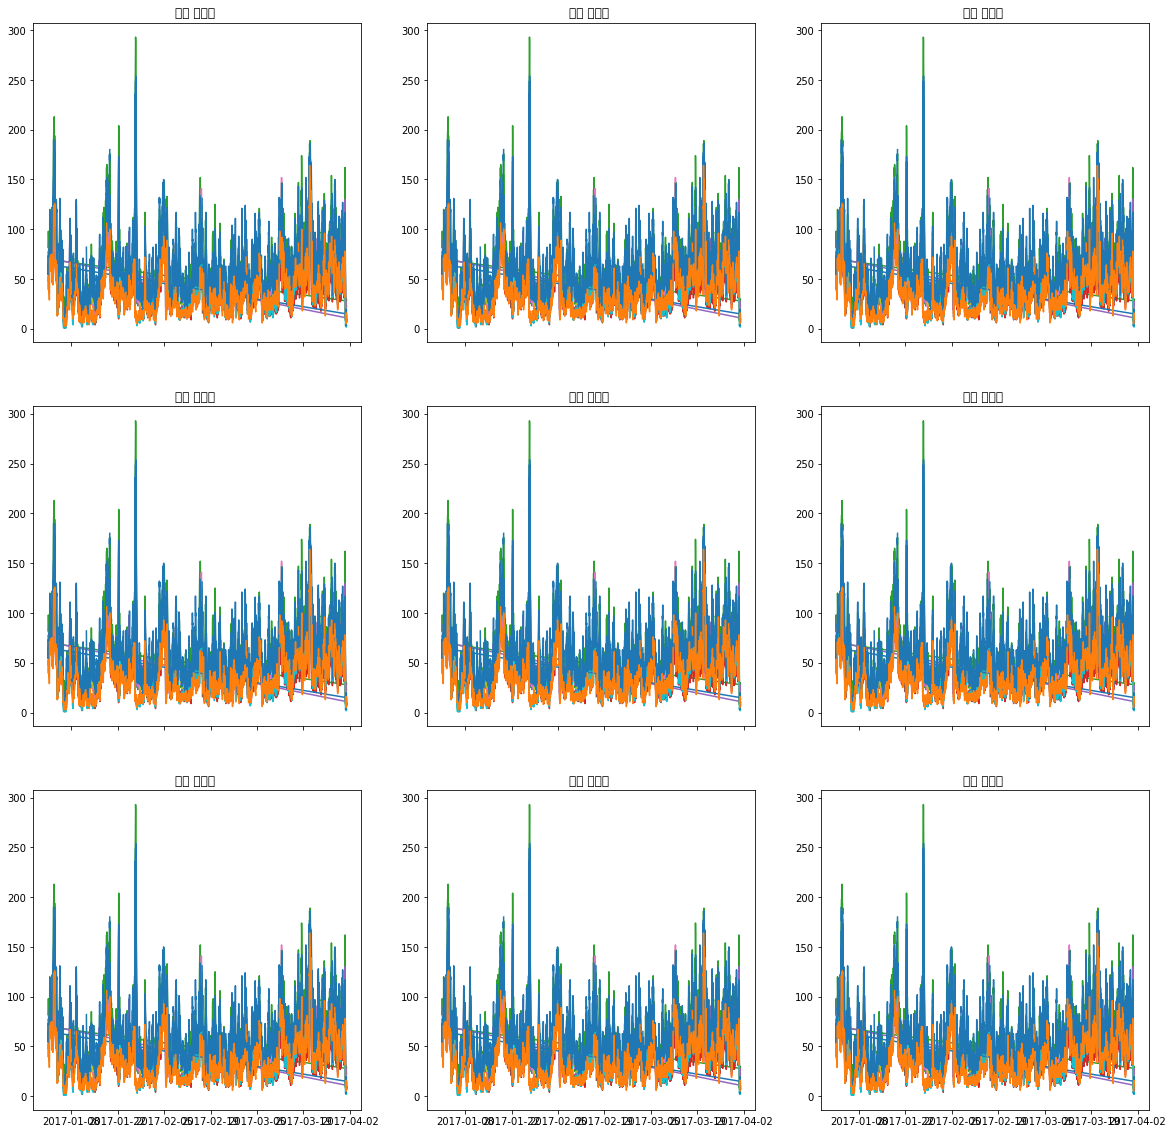

In [172]:
f, axarr = plt.subplots(3, 3, sharex = True, figsize = (20, 20))
region_name = list(micro_1["region"].unique())
for name in region_name[ : 5+1] :
    target = micro_1[micro_1["region"] == name]
    print(name)
    for i in range(2+1) : 
        for j in range(2+1) :
            axarr[i, j].plot(target[["PM10", "PM25"]])
            axarr[i, j].set_title(name)
plt.show()

In [149]:
f, axarr = plt.subplots(3, len(region_name), sharex = True, figsize = (20, 20))

axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')

TypeError: 'NoneType' object cannot be interpreted as an integer